In [39]:
#importing libraries and functions
import nltk
import PyPDF2
import string

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('vader_lexicon')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jjgzz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jjgzz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jjgzz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jjgzz\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
#extracting text
def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
    return text

fox = extract_text_from_pdf(r"C:\Users\jjgzz\Desktop\Documents\Babson\Semester 3\Programming\Assignment 1\foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf")

reuters = extract_text_from_pdf(r"C:\Users\jjgzz\Desktop\Documents\Babson\Semester 3\Programming\Assignment 1\reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf")

In [25]:
#fox text
fox

'1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit\nwith more plagiarism charges\nfoxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges\nMedia\nHarvard ‘received a complaint outlining over 40 allegations of\nplagiarism,’ according to the Free Beacon\n By Brian Flood  Fox News\nPublished December 20, 2023 12:59pm EST\nHarvard president facing 40 new allegations of plagiarism\nFox News\' Molly Line reports the latest on the allegations. \nEmbattled Harvard University President Claudine Gay  has been slapped with additional\ncharges of plagiarism. \nThe Washington Free Beacon  reported Harvard "received a complaint outlining over 40\nallegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard\'s\nresearch integrity of ficer, Stacey Springs, outlining the claims. \n"The document paints a picture of a pattern of misconduct more extensive than has been\npreviously reported and puts the Harvard Cor

In [21]:
#reuters text
reuters

'1 / 3Gabriella BorterHarvard president will submit dissertation edits after\nplagiarism allegations\nreuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21\nHarvard University President Claudine Gay testifies before a House Education and The\nWorkforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting\nAntisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken\nCedeno/File Photo Acquire Licensing Rights\nDec 21 (Reuters) - Harvard University\'s president was planning to submit three corrections to\nher 1997 dissertation after a committee investigating plagiarism allegations against her found\nthat she had made citation errors, a university spokesperson said.\nClaudine Gay , who was inaugurated as Harvard\'s president in September , has already\nsubmitted corrections to two published articles in recent weeks that were the focus of a\nreview by the Harvard Corporation, the university\

In [15]:
#cleaning, tokenizing

def clean_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

tokens_fox = clean_text(fox)
tokens_reuters = clean_text(reuters)

print("Fox tokens:", tokens_fox[:20])
print("Reuters tokens:", tokens_reuters[:20])

Fox tokens: ['floodembattled', 'harvard', 'university', 'president', 'claudine', 'gay', 'hit', 'plagiarism', 'charges', 'media', 'harvard', 'received', 'complaint', 'outlining', 'allegations', 'plagiarism', 'according', 'free', 'beacon', 'brian']
Reuters tokens: ['borterharvard', 'president', 'submit', 'dissertation', 'edits', 'plagiarism', 'allegations', 'harvard', 'university', 'president', 'claudine', 'gay', 'testifies', 'house', 'education', 'workforce', 'committee', 'hearing', 'titled', 'holding']


In [49]:
# Sentiment analysis
#No, I am your father
sia = SentimentIntensityAnalyzer()

fox_sentiment = sia.polarity_scores(fox)
reuters_sentiment = sia.polarity_scores(reuters)

print("Fox News Sentiment:", fox_sentiment)
print("Reuters Sentiment:", reuters_sentiment)

#reuters text seems to lean slightly more into the negative and neutrality, conversely, there seems to be a little more positivity with fox
#this does not make sense though, so the text would have to be parsed

Fox News Sentiment: {'neg': 0.065, 'neu': 0.866, 'pos': 0.07, 'compound': 0.7243}
Reuters Sentiment: {'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}


In [47]:
# Headline analysis
fox_headline = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"
reuters_headline = "Harvard president will submit dissertation edits after plagiarism allegations"

print("Fox Headline Sentiment:", sia.polarity_scores(fox_headline))
print("Reuters Headline Sentiment:", sia.polarity_scores(reuters_headline))

#fox headline leans into the more negative side, reuters seems to be fully neutral

Fox Headline Sentiment: {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}
Reuters Headline Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [37]:
# Fox readability
r_fox = Readability(fox)
print("Fox Flesch Reading Ease:", r_fox.flesch().score)
print("Fox Gunning Fog Index:", r_fox.gunning_fog().score)

# Reuters readability
r_reuters = Readability(reuters)
print("Reuters Flesch Reading Ease:", r_reuters.flesch().score)
print("Reuters Gunning Fog Index:", r_reuters.gunning_fog().score)


Fox Flesch Reading Ease: 21.41115320671068
Fox Gunning Fog Index: 21.868487077434633
Reuters Flesch Reading Ease: 16.550377619402184
Reuters Gunning Fog Index: 19.59404318689501


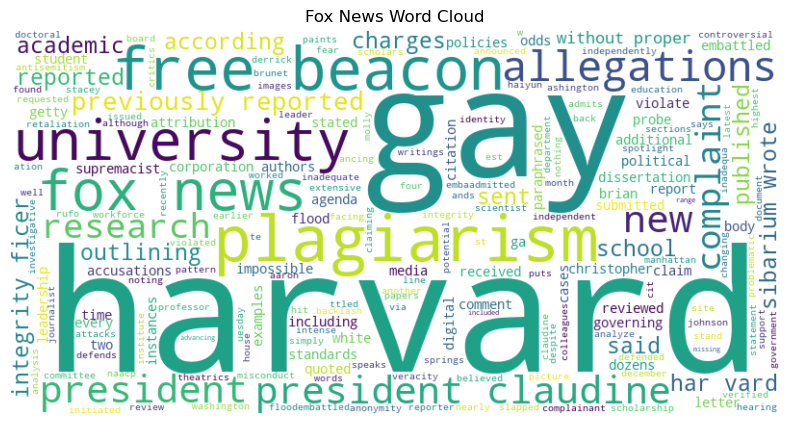

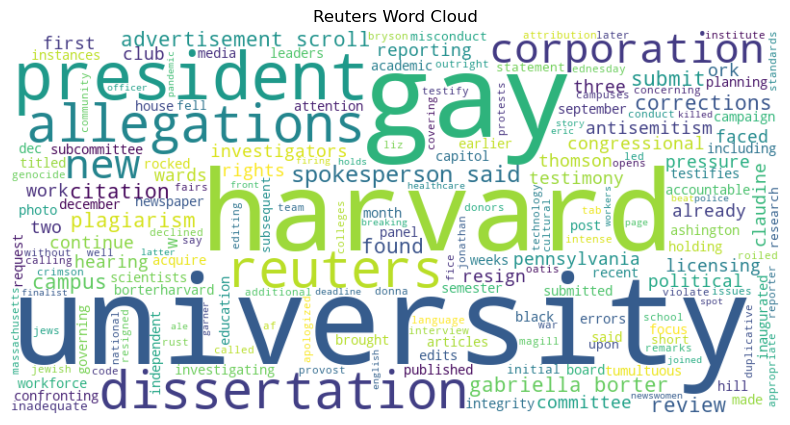

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fox Wordcloud
wordcloud_fox = WordCloud(width=800, height=400, background_color='white').generate(" ".join(tokens_fox))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_fox, interpolation='bilinear')
plt.axis('off')
plt.title("Fox News Word Cloud")
plt.show()

# Reuters Wordcloud
wordcloud_reuters = WordCloud(width=800, height=400, background_color='white').generate(" ".join(tokens_reuters))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_reuters, interpolation='bilinear')
plt.axis('off')
plt.title("Reuters Word Cloud")
plt.show()

#reading through it, looks like fox has more mentions of chargings, allegations, focus on her dissertation
#in contrast, reuters mentions the title, word university more, seems to quote a lot (more mentions of said)
#there doesn't seem to be anything too accusing from either of these word clouds